In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [216]:
df=pd.read_csv("D:\\pyt\\Assignment\\Assignment 5-Multi Linear Regression\\ToyotaCorolla.csv")

In [217]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [218]:
df.shape

(1436, 38)

In [219]:
df1=pd.DataFrame({"Price":df.Price, "Age":df.Age_08_04, "KM": df.KM, "HP":df.HP, 
                  "CC":df.cc, "Doors":df.Doors, "Gears":df.Gears, "Quarterly_Tax":df.Quarterly_Tax, "Weight":df.Weight})

In [220]:
df1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [221]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [222]:
df1=df1.drop_duplicates().reset_index(drop=True)

In [223]:
df1.shape

(1435, 9)

In [224]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age            1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   CC             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


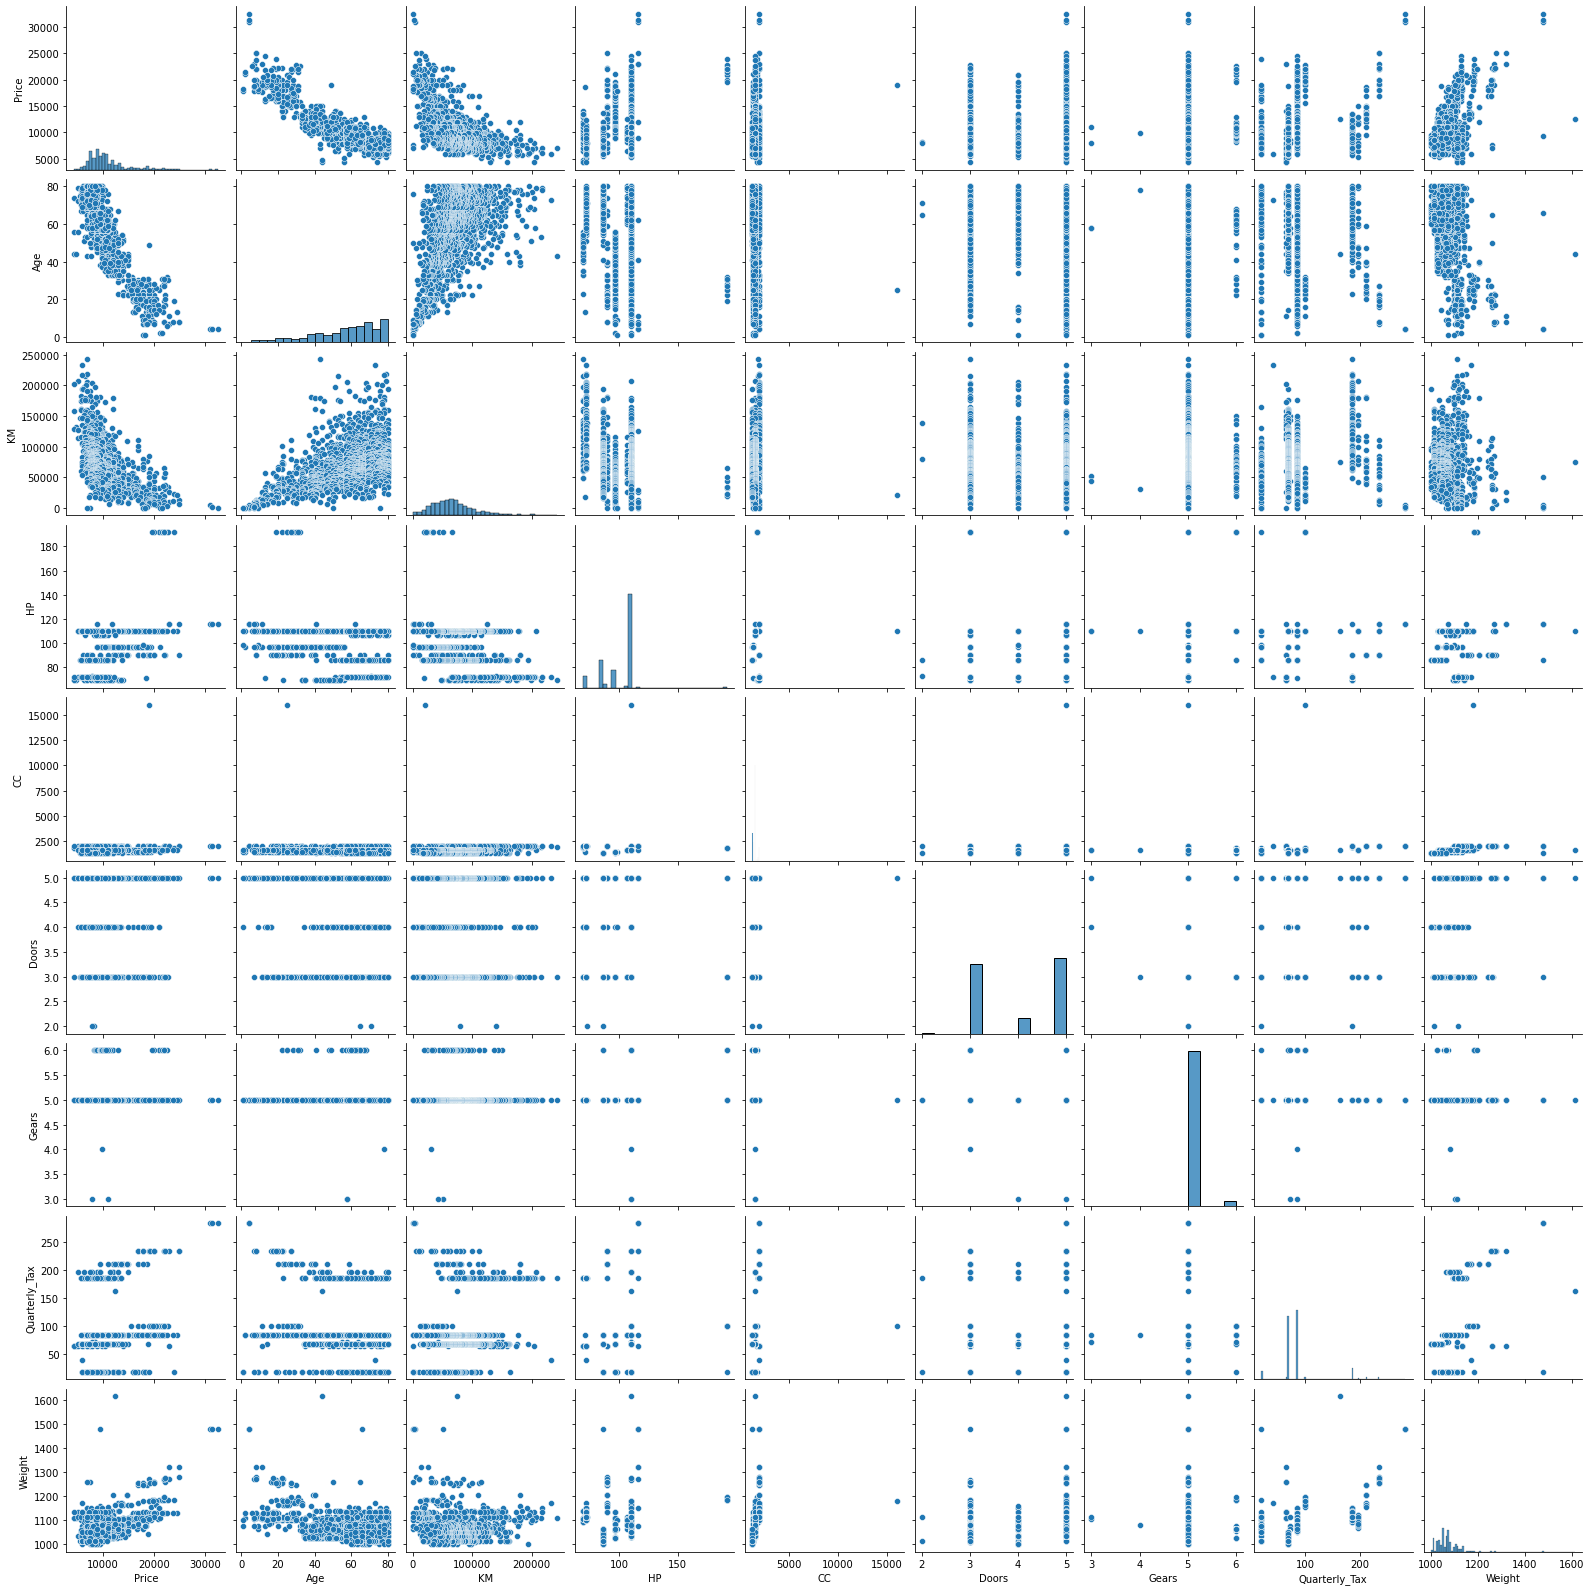

In [225]:
sns.pairplot(df1)

In [226]:
model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit()

In [227]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:51:36   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
CC               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking VIF index for non-colinearity

In [228]:
age_rsq=smf.ols("Age~KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_age=1/(1-age_rsq)

km_rsq=smf.ols("KM~Age+HP+CC+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_km=1/(1-km_rsq)

hp_rsq=smf.ols("HP~Age+KM+CC+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_hp=1/(1-hp_rsq)

CC_rsq=smf.ols("CC~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_CC=1/(1-CC_rsq)

Doors_rsq=smf.ols("Doors~Age+KM+HP+CC+Gears+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_Doors=1/(1-Doors_rsq)

Gears_rsq=smf.ols("Gears~Age+KM+HP+CC+Doors+Quarterly_Tax+Weight", data=df1).fit().rsquared
vif_Gears=1/(1-Gears_rsq)

Quarterly_Tax_rsq=smf.ols("Quarterly_Tax~Age+KM+HP+CC+Doors+Gears+Weight", data=df1).fit().rsquared
vif_Quarterly_Tax=1/(1-Quarterly_Tax_rsq)


Weight_rsq=smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax", data=df1).fit().rsquared
vif_Weight=1/(1-Weight_rsq)

In [229]:
vif=pd.DataFrame({"features":["Age", "KM", "HP", "CC", "Doors", "Gears","Quarterly_Tax", "weight"],
                  "VIF":[vif_age,vif_km,vif_hp,vif_CC,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]})

In [230]:
vif

,features,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,weight,2.487180


In [231]:
# As all values are less than 3 , no poroblem with colinearity

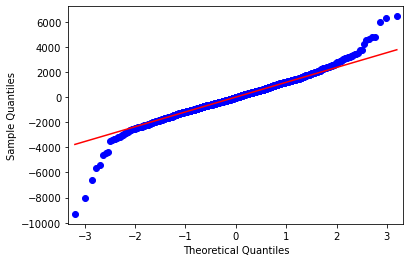

In [232]:
# Plotting residulas
sm.qqplot(model.resid, line="q")
plt.show()

In [233]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [234]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [235]:
# Cooks distance

In [236]:
c,a= model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

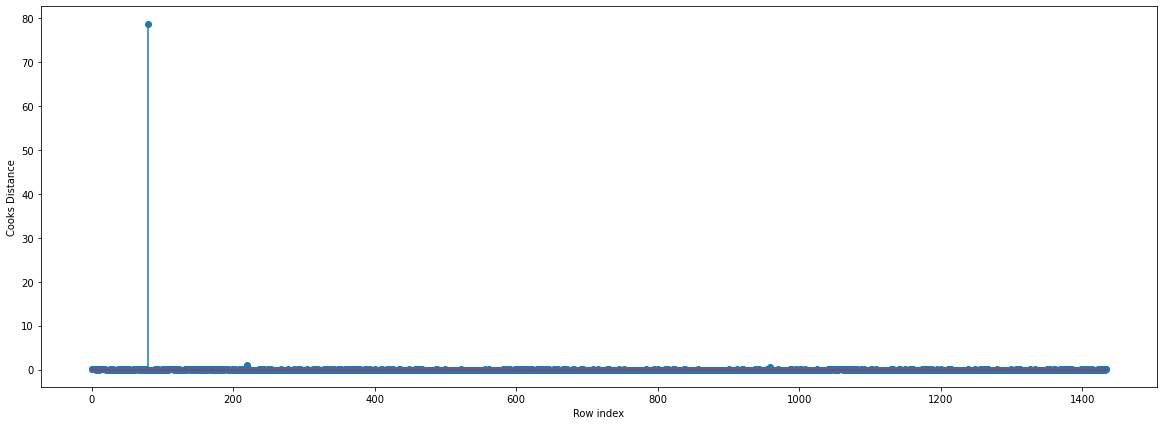

In [237]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

In [238]:
np.argmax(c), np.max(c)

(80, 78.7295058224851)

In [239]:
from statsmodels.graphics.regressionplots import influence_plot

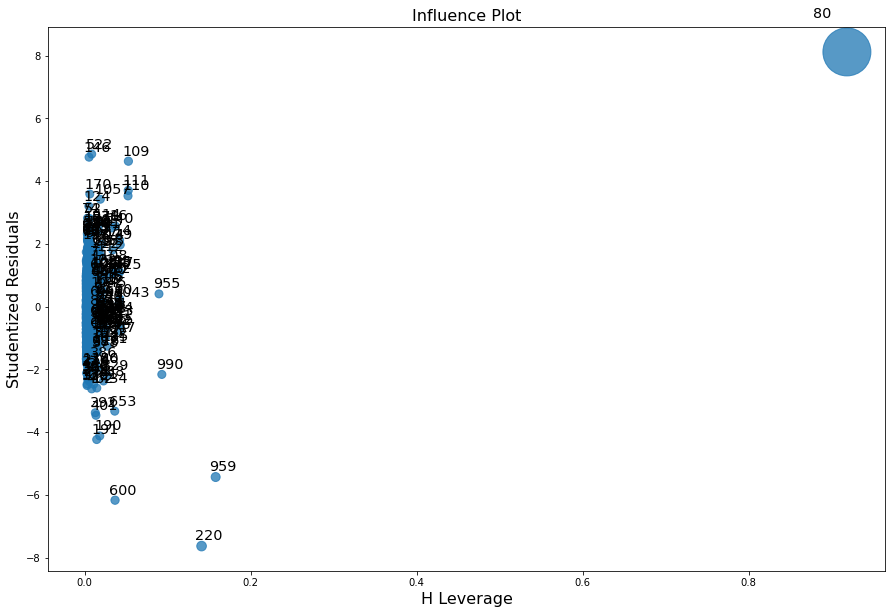

In [240]:
fig,ax=plt.subplots(figsize=(15,10))
fig=influence_plot(model, ax=ax)
plt.show()

In [241]:
 #Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df1.shape[1]
n=df1.shape[0]
cut_off = (3*(k+1))/n
cut_off

0.020905923344947737

In [242]:
#From the above plot, it is evident that points beyond leverage cutoff value=0.020905 are the outliers
df1[df1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [243]:
df1=df1.drop(df.index[[80]]).reset_index(drop=True)

In [244]:
df1.shape

(1434, 9)

In [245]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df1=df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df1
    else:
        final_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit()
        final_model.rsquared , final_model.aic
print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9003762532318559


In [246]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1330 non-null   int64
 1   Age            1330 non-null   int64
 2   KM             1330 non-null   int64
 3   HP             1330 non-null   int64
 4   CC             1330 non-null   int64
 5   Doors          1330 non-null   int64
 6   Gears          1330 non-null   int64
 7   Quarterly_Tax  1330 non-null   int64
 8   Weight         1330 non-null   int64
dtypes: int64(9)
memory usage: 93.6 KB


In [247]:
final_model.predict(df1)

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64